In [1]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# read in data
df_og = pd.read_csv("heart_2020_cleaned.csv")
df_og.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#counts for whether coin trades or not
df_og.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [6]:
# Heart Disease Counts
NoDisease_count, Disease_count = df_og.HeartDisease.value_counts()

# Separate the yes and no
NoDisease = df_og[df_og['HeartDisease'] == 'No']
Disease = df_og[df_og['HeartDisease'] == 'Yes']

# print the shape
print('class No Disease:', NoDisease.shape)
print('class Disease:', Disease.shape)

class No Disease: (292422, 18)
class Disease: (27373, 18)


total class of 1 and0: No     27373
Yes    27373
Name: HeartDisease, dtype: int64


<AxesSubplot:title={'center':'count (DataSample)'}>

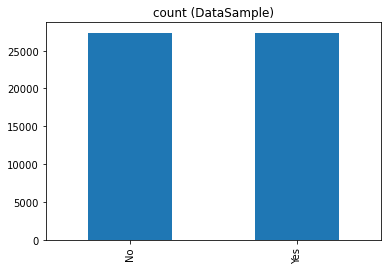

In [7]:
NoDisease_under = NoDisease.sample(Disease_count)

df = pd.concat([NoDisease_under, Disease], axis=0)

print("total class of 1 and0:",df['HeartDisease'].value_counts())

# plot the count after under-sampeling
df['HeartDisease'].value_counts().plot(kind='bar', title='count (DataSample)')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 82403 to 319790
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  object 
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  object 
 3   AlcoholDrinking   54746 non-null  object 
 4   Stroke            54746 non-null  object 
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  object 
 8   Sex               54746 non-null  object 
 9   AgeCategory       54746 non-null  object 
 10  Race              54746 non-null  object 
 11  Diabetic          54746 non-null  object 
 12  PhysicalActivity  54746 non-null  object 
 13  GenHealth         54746 non-null  object 
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  object 
 16  KidneyDisease     54746 non-null  o

In [9]:
str_cols = []

for col in df.columns:
    if (df[col].dtype == object) & (col != "HeartDisease"):
        print(col)
        str_cols.append(col)
        
df_str = df.loc[:, str_cols]
df_str.head()

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


Smoking AlcoholDrinking Stroke DiffWalking     Sex  AgeCategory   Race  \
82403       No              No     No          No  Female        60-64  White   
290489     Yes              No     No          No    Male        30-34  White   
81925      Yes              No     No          No  Female        45-49  White   
137612      No              No     No          No  Female        65-69  White   
204314     Yes              No     No          No  Female  80 or older  White   

       Diabetic PhysicalActivity  GenHealth Asthma KidneyDisease SkinCancer  
82403       Yes               No       Good     No            No         No  
290489       No              Yes       Good    Yes            No         No  
81925        No               No       Fair    Yes            No        Yes  
137612       No              Yes  Very good     No            No         No  
204314       No              Yes  Excellent     No            No         No

In [10]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

Smoking
No     27923
Yes    26823
Name: Smoking, dtype: int64

AlcoholDrinking
No     51698
Yes     3048
Name: AlcoholDrinking, dtype: int64

Stroke
No     49606
Yes     5140
Name: Stroke, dtype: int64

DiffWalking
No     41435
Yes    13311
Name: DiffWalking, dtype: int64

Sex
Male      28862
Female    25884
Name: Sex, dtype: int64

AgeCategory
80 or older    7311
70-74          7215
65-69          6927
60-64          6205
75-79          5736
55-59          4715
50-54          3594
45-49          2755
40-44          2351
35-39          2187
18-24          2052
30-34          1975
25-29          1723
Name: AgeCategory, dtype: int64

Race
White                             43392
Hispanic                           3925
Black                              3630
Other                              1830
Asian                              1013
American Indian/Alaskan Native      956
Name: Race, dtype: int64

Diabetic
No                         41099
Yes                        12019
No, borderline

In [11]:
df_str_label = df_str.copy()

In [12]:
df_str_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 82403 to 319790
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Smoking           54746 non-null  object
 1   AlcoholDrinking   54746 non-null  object
 2   Stroke            54746 non-null  object
 3   DiffWalking       54746 non-null  object
 4   Sex               54746 non-null  object
 5   AgeCategory       54746 non-null  object
 6   Race              54746 non-null  object
 7   Diabetic          54746 non-null  object
 8   PhysicalActivity  54746 non-null  object
 9   GenHealth         54746 non-null  object
 10  Asthma            54746 non-null  object
 11  KidneyDisease     54746 non-null  object
 12  SkinCancer        54746 non-null  object
dtypes: object(13)
memory usage: 5.8+ MB


In [13]:
df_str_label.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [14]:
# df_str_label2 = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
# df_str_label2.head()

In [15]:
#categorial
le = LabelEncoder()
col1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]
for i in col1:
  df_str_label[i] = le.fit_transform(df_str_label[i])
df_str_label.head()

Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  \
82403         0                0       0            0    0        60-64   
290489        1                0       0            0    1        30-34   
81925         1                0       0            0    0        45-49   
137612        0                0       0            0    0        65-69   
204314        1                0       0            0    0  80 or older   

         Race Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  \
82403   White      Yes                 0       Good       0              0   
290489  White       No                 1       Good       1              0   
81925   White       No                 0       Fair       1              0   
137612  White       No                 1  Very good       0              0   
204314  White       No                 1  Excellent       0              0   

        SkinCancer  
82403            0  
290489           0  
81925            1  
137612           0  
204314           0

In [16]:
df1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 82403 to 319790
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Smoking           54746 non-null  int32
 1   AlcoholDrinking   54746 non-null  int32
 2   Stroke            54746 non-null  int32
 3   DiffWalking       54746 non-null  int32
 4   Sex               54746 non-null  int32
 5   PhysicalActivity  54746 non-null  int32
 6   Asthma            54746 non-null  int32
 7   KidneyDisease     54746 non-null  int32
 8   SkinCancer        54746 non-null  int32
dtypes: int32(9)
memory usage: 2.3 MB


In [18]:
df_str_dum = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
df_str_dum.head()

AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  \
82403                   0                  0                  0   
290489                  0                  0                  1   
81925                   0                  0                  0   
137612                  0                  0                  0   
204314                  0                  0                  0   

        AgeCategory_35-39  AgeCategory_40-44  AgeCategory_45-49  \
82403                   0                  0                  0   
290489                  0                  0                  0   
81925                   0                  0                  1   
137612                  0                  0                  0   
204314                  0                  0                  0   

        AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
82403                   0                  0                  1   
290489                  0                  0                  0   
81925                   0                  0                  0   
137612                  0                  0                  0   
204314                  0                  0                  0   

        AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
82403                   0                  0                  0   
290489                  0                  0                  0   
81925                   0                  0                  0   
137612                  1                  0                  0   
204314                  0                  0                  0   

        AgeCategory_80 or older  Race_American Indian/Alaskan Native  \
82403                         0                                    0   
290489                        0                                    0   
81925                         0                                    0   
137612                        0                                    0   
204314                        1                                    0   

        Race_Asian  Race_Black  Race_Hispanic  Race_Other  Race_White  \
82403            0           0              0           0           1   
290489           0           0              0           0           1   
81925            0           0              0           0           1   
137612           0           0              0           0           1   
204314           0           0              0           0           1   

        Diabetic_No  Diabetic_No, borderline diabetes  Diabetic_Yes  \
82403             0                                 0             1   
290489            1                                 0             0   
81925             1                                 0             0   
137612            1                                 0             0   
204314            1                                 0             0   

        Diabetic_Yes (during pregnancy)  GenHealth_Excellent  GenHealth_Fair  \
82403                                 0                    0               0   
290489                                0                    0               0   
81925                                 0                    0               1   
137612                                0                    0               0   
204314                                0                    1               0   

        GenHealth_Good  GenHealth_Poor  GenHealth_Very good  
82403                1               0                    0  
290489               1               0                    0  
81925                0               0                    0  
137612               0               0                    1  
204314               0               0                    0

In [19]:
df_str1 = pd.concat([df1, df_str_dum], axis=1,)

In [20]:
num_cols = []

for col in df.columns:
    if (df[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols.append(col)
        
df_num = df.loc[:, num_cols]
df_num.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


BMI  PhysicalHealth  MentalHealth  SleepTime
82403   30.85             7.0           0.0        6.0
290489  32.08            14.0           1.0        7.0
81925   21.87             1.0          23.0        8.0
137612  27.44             0.0           0.0        8.0
204314  19.58             2.0           5.0        9.0

In [21]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 82403 to 319790
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             54746 non-null  float64
 1   PhysicalHealth  54746 non-null  float64
 2   MentalHealth    54746 non-null  float64
 3   SleepTime       54746 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


In [22]:
df_num.describe()

BMI  PhysicalHealth  MentalHealth     SleepTime
count  54746.000000    54746.000000  54746.000000  54746.000000
mean      28.826777        5.391700      4.267618      7.113616
std        6.507946        9.968965      8.586155      1.604299
min       12.210000        0.000000      0.000000      1.000000
25%       24.390000        0.000000      0.000000      6.000000
50%       27.760000        0.000000      0.000000      7.000000
75%       32.080000        5.000000      3.000000      8.000000
max       88.190000       30.000000     30.000000     24.000000

In [23]:
df_no_scale = df_num.copy()

In [24]:
df_num.drop('SleepTime', axis=1, inplace=True)

In [25]:
df_num.head()

BMI  PhysicalHealth  MentalHealth
82403   30.85             7.0           0.0
290489  32.08            14.0           1.0
81925   21.87             1.0          23.0
137612  27.44             0.0           0.0
204314  19.58             2.0           5.0

In [26]:
Scaler = StandardScaler()
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num[num_cols] = Scaler.fit_transform(df_num[num_cols])

In [27]:
df_scale=df_num.copy()

In [28]:
df_scale.head()

BMI  PhysicalHealth  MentalHealth
82403   0.310888        0.161332     -0.497039
290489  0.499889        0.863518     -0.380572
81925  -1.068976       -0.440541      2.181716
137612 -0.213092       -0.540853     -0.497039
204314 -1.420857       -0.340229      0.085299

In [29]:
# scaler = StandardScaler().fit(df_num)
# df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
# df_scale.head()

In [30]:
df_train_scale = pd.concat([df_scale, df_str1], axis=1)

In [31]:
# scale training set
df_train_scale = pd.concat([df_scale, df_str1], axis=1)
df_train_scale["HeartDisease"] = df.HeartDisease

df_train_scale["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_train_scale.HeartDisease]
df_train_scale.head()

BMI  PhysicalHealth  MentalHealth  Smoking  AlcoholDrinking  \
82403   0.310888        0.161332     -0.497039        0                0   
290489  0.499889        0.863518     -0.380572        1                0   
81925  -1.068976       -0.440541      2.181716        1                0   
137612 -0.213092       -0.540853     -0.497039        0                0   
204314 -1.420857       -0.340229      0.085299        1                0   

        Stroke  DiffWalking  Sex  PhysicalActivity  Asthma  KidneyDisease  \
82403        0            0    0                 0       0              0   
290489       0            0    1                 1       1              0   
81925        0            0    0                 0       1              0   
137612       0            0    0                 1       0              0   
204314       0            0    0                 1       0              0   

        SkinCancer  AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  \
82403            0                  0                  0                  0   
290489           0                  0                  0                  1   
81925            1                  0                  0                  0   
137612           0                  0                  0                  0   
204314           0                  0                  0                  0   

        AgeCategory_35-39  AgeCategory_40-44  AgeCategory_45-49  \
82403                   0                  0                  0   
290489                  0                  0                  0   
81925                   0                  0                  1   
137612                  0                  0                  0   
204314                  0                  0                  0   

        AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
82403                   0                  0                  1   
290489                  0                  0                  0   
81925                   0                  0                  0   
137612                  0                  0                  0   
204314                  0                  0                  0   

        AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
82403                   0                  0                  0   
290489                  0                  0                  0   
81925                   0                  0                  0   
137612                  1                  0                  0   
204314                  0                  0                  0   

        AgeCategory_80 or older  Race_American Indian/Alaskan Native  \
82403                         0                                    0   
290489                        0                                    0   
81925                         0                                    0   
137612                        0                                    0   
204314                        1                                    0   

        Race_Asian  Race_Black  Race_Hispanic  Race_Other  Race_White  \
82403            0           0              0           0           1   
290489           0           0              0           0           1   
81925            0           0              0           0           1   
137612           0           0              0           0           1   
204314           0           0              0           0           1   

        Diabetic_No  Diabetic_No, borderline diabetes  Diabetic_Yes  \
82403             0                                 0             1   
290489            1                                 0             0   
81925             1                                 0             0   
137612            1                                 0             0   
204314            1                                 0             0   

        Diabetic_Yes (during pregnancy)  GenHealth_Excellent  GenHealth_Fair  \
82403                         

In [32]:
# df_train_scale.info()

In [33]:
# corrs = abs(df_train_scale.corr())["HeartDisease"].sort_values(ascending=False)
# corrs

In [34]:
# corrs = abs(df_train_scale.corr())["HeartDisease"].sort_values(ascending=False)
# corrs

In [35]:
df_og2 = df_og.copy()

df_str_2 = df_og2.loc[:, str_cols]

col1 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

le = LabelEncoder()
for i in col1:
  df_str_2[i] = le.fit_transform(df_str_2[i])

df2 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

df_dum_2 = pd.get_dummies(df_str_2.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])

df_string_2=pd.concat([df2, df_dum_2], axis=1)

num_cols2 = []

for col in df_og2.columns:
    if (df_og2[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols2.append(col)
        
df_num2 = df_og2.loc[:, num_cols2]

df_num2.drop('SleepTime', axis=1, inplace=True)

num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num2[num_cols] = Scaler.transform(df_num2[num_cols])
df_all = pd.concat([df_num2, df_string_2], axis=1)
df_all["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_og2.HeartDisease]
df_all.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


BMI  PhysicalHealth  MentalHealth  Smoking  AlcoholDrinking  Stroke  \
0 -1.878763       -0.239917      2.996990        1                0       0   
1 -1.304076       -0.540853     -0.497039        0                0       1   
2 -0.345239        1.465391      2.996990        1                0       0   
3 -0.709413       -0.540853     -0.497039        0                0       0   
4 -0.786243        2.267889     -0.497039        0                0       0   

   DiffWalking  Sex  PhysicalActivity  Asthma  KidneyDisease  SkinCancer  \
0            0    0                 1       1              0           1   
1            0    0                 1       0              0           0   
2            0    1                 1       1              0           0   
3            0    0                 0       0              0           1   
4            1    0                 1       0              0           0   

   AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  AgeCategory_35-39  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   AgeCategory_40-44  AgeCategory_45-49  AgeCategory_50-54  AgeCategory_55-59  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  1                  0                  0                  0   

   AgeCategory_60-64  AgeCategory_65-69  AgeCategory_70-74  AgeCategory_75-79  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   AgeCategory_80 or older  Race_American Indian/Alaskan Native  Race_Asian  \
0                        0                                    0           0   
1                        1                                    0           0   
2                        0                                    0           0   
3                        0                                    0           0   
4                        0                                    0           0   

   Race_Black  Race_Hispanic  Race_Other  Race_White  Diabetic_No  \
0           0              0           0           1            0   
1           0              0           0           1            1   
2           0              0           0           1            0   
3           0              0           0           1            1   
4           0              0           0           1            1   

   Diabetic_No, borderline diabetes  Diabetic_Yes  \
0                                 0             1   
1                                 0             0   
2                                 0             1   
3                                 0             0   
4                                 0             0   

   Diabetic_Yes (during pregnancy)  GenHealth_Excellent  GenHealth_Fair  \
0                                0                    0               0   
1                                0                    0               0   
2                                0                    0               1   
3                                0                    0               0   
4                              

In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   Smoking                              319795 non-null  int32  
 4   AlcoholDrinking                      319795 non-null  int32  
 5   Stroke                               319795 non-null  int32  
 6   DiffWalking                          319795 non-null  int32  
 7   Sex                                  319795 non-null  int32  
 8   PhysicalActivity                     319795 non-null  int32  
 9   Asthma                               319795 non-null  int32  
 10  KidneyDisease                        319795 non-null  int32  
 11  SkinCancer   

In [37]:
df_og2["HeartDisease"]

0          No
1          No
2          No
3          No
4          No
5         Yes
6          No
7          No
8          No
9          No
10        Yes
11         No
12         No
13         No
14         No
15         No
16         No
17         No
18         No
19         No
20         No
21         No
22         No
23         No
24         No
25         No
26         No
27         No
28         No
29         No
30         No
31         No
32         No
33         No
34         No
35        Yes
36         No
37         No
38         No
39         No
40         No
41         No
42        Yes
43        Yes
44         No
45        Yes
46         No
47         No
48         No
49         No
50         No
51         No
52         No
53         No
54         No
55         No
56         No
57         No
58         No
59         No
60         No
61         No
62         No
63         No
64         No
65         No
66         No
67         No
68         No
69         No
70         No
71    

In [38]:
# get features and target
X = df_train_scale.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y = df_train_scale["HeartDisease"].values

In [39]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499908669126512
0.25000913308734884


In [40]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20548
           1       0.76      0.78      0.77     20511

    accuracy                           0.76     41059
   macro avg       0.76      0.76      0.76     41059
weighted avg       0.76      0.76      0.76     41059

[[15343  5205]
 [ 4467 16044]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      6825
           1       0.75      0.78      0.76      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[5051 1774]
 [1533 5329]]


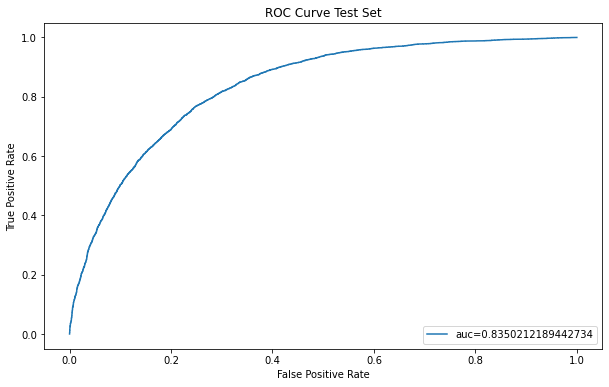

In [41]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.82      0.77      0.80     20548
           1       0.78      0.83      0.81     20511

    accuracy                           0.80     41059
   macro avg       0.80      0.80      0.80     41059
weighted avg       0.80      0.80      0.80     41059

[[15865  4683]
 [ 3449 17062]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      6825
           1       0.74      0.79      0.76      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[4922 1903]
 [1444 5418]]


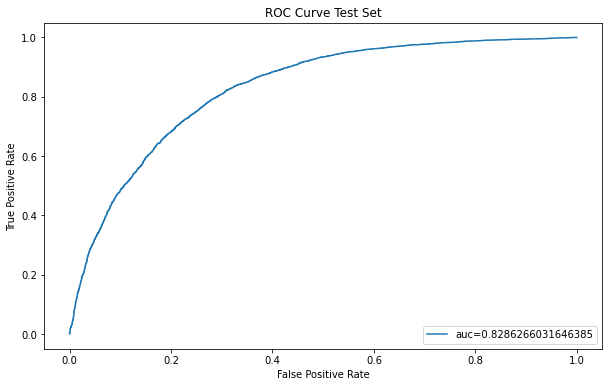

In [42]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.80      0.73      0.77     20548
           1       0.76      0.82      0.79     20511

    accuracy                           0.78     41059
   macro avg       0.78      0.78      0.78     41059
weighted avg       0.78      0.78      0.78     41059

[[15097  5451]
 [ 3659 16852]]

Testing SET
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      6825
           1       0.74      0.81      0.77      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[4888 1937]
 [1335 5527]]


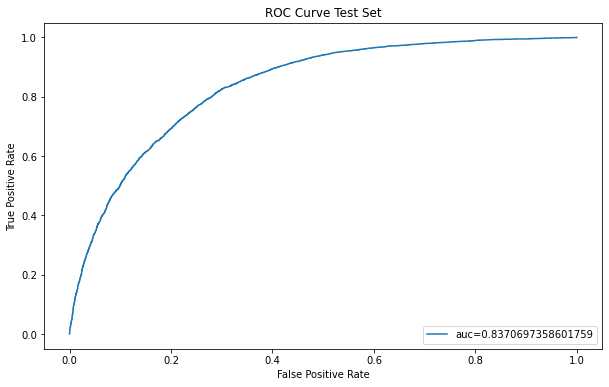

In [43]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     20548
           1       0.76      0.78      0.77     20511

    accuracy                           0.76     41059
   macro avg       0.76      0.76      0.76     41059
weighted avg       0.76      0.76      0.76     41059

[[15415  5133]
 [ 4586 15925]]

Testing SET
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6825
           1       0.75      0.77      0.76      6862

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687

[[5083 1742]
 [1577 5285]]


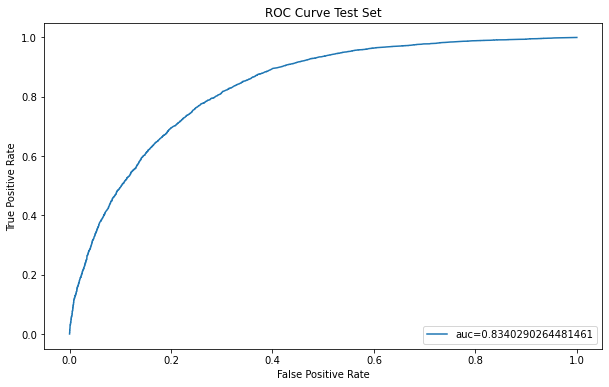

In [44]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20548
           1       0.99      0.99      0.99     20511

    accuracy                           0.99     41059
   macro avg       0.99      0.99      0.99     41059
weighted avg       0.99      0.99      0.99     41059

[[20405   143]
 [  160 20351]]

Testing SET
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6825
           1       0.72      0.75      0.73      6862

    accuracy                           0.73     13687
   macro avg       0.73      0.73      0.73     13687
weighted avg       0.73      0.73      0.73     13687

[[4784 2041]
 [1707 5155]]


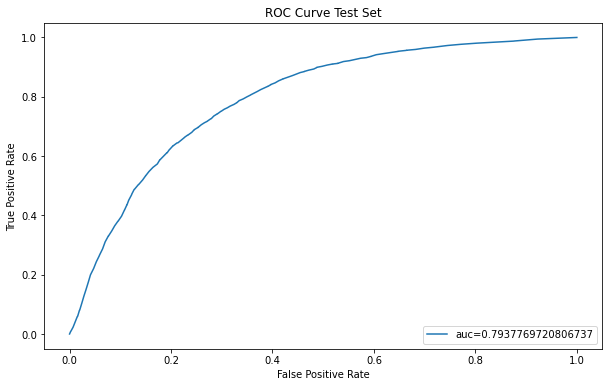

In [45]:
randomForest = RandomForestClassifier(random_state=42)
randomForest = evaluateModel(randomForest, X_train, y_train, X_test, y_test)

In [46]:
#first Machine Learning attempt determined that Random Forest 
#is our best model to determine if a patient has heart disease or not

              precision    recall  f1-score   support

           0       0.98      0.72      0.83    292422
           1       0.22      0.82      0.34     27373

    accuracy                           0.73    319795
   macro avg       0.60      0.77      0.59    319795
weighted avg       0.91      0.73      0.79    319795

[[211733  80689]
 [  4994  22379]]


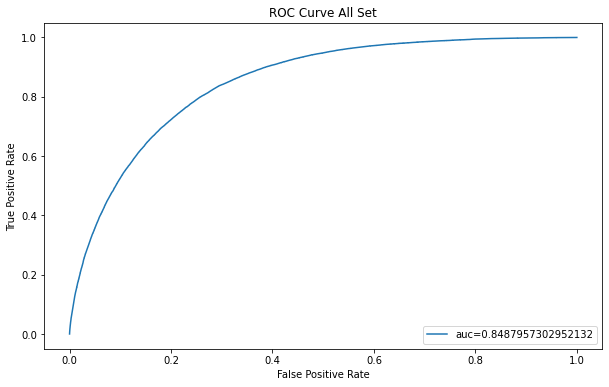

In [47]:
# get features and target
x_all = df_all.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1).values
y_all = df_all["HeartDisease"].values

test_preds = lgbm.predict(x_all)
class_report_test = classification_report(y_all, test_preds)
conf_matrix_test = confusion_matrix(y_all, test_preds)

print(class_report_test)
print(conf_matrix_test)

y_pred_proba = lgbm.predict_proba(x_all)[::,1]
fpr, tpr, _ = roc_curve(y_all,  y_pred_proba)
auc = roc_auc_score(y_all, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve All Set")
plt.legend(loc=4)
plt.show()

In [49]:
import pickle

In [51]:
filename = 'finalized_model.sav'
pickle.dump(lgbm, open(filename, 'wb'))

In [ ]:
Prepare the testing data

In [58]:
df_allModel = df_all.drop(["HeartDisease", "AgeCategory_55-59", "Race_Other","Diabetic_Yes (during pregnancy)", "GenHealth_Good"], axis=1)


In [52]:
lgbm_load = pickle.load(open(filename,'rb'))

In [60]:
X = np.array(df_allModel)
preds = lgbm_load.predict_proba(X)
preds_singular = lgbm_load.predict(X)

preds_singular[0]

0

In [61]:
submission = pd.DataFrame()

In [63]:
submission = pd.DataFrame()
submission["HeartDisease"] = df_og.HeartDisease
submission['Predictions'] = preds_singular

submission.head(20)

HeartDisease  Predictions
0            No            0
1            No            1
2            No            1
3            No            0
4            No            0
5           Yes            1
6            No            1
7            No            1
8            No            1
9            No            1
10          Yes            1
11           No            0
12           No            1
13           No            1
14           No            1
15           No            0
16           No            0
17           No            1
18           No            1
19           No            1